In [1]:
#MI PROYECTO

%pip install ipython
%pip install seaborn

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import numpy as np

import re

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
shark = pd.read_csv(r"\Users\ccior\IRONHACK\Proyectos\01-w2-pandas-Carlos-Ciordia\src\attacks.csv", encoding="ISO-8859-1")

In [3]:
raw_shark = shark.copy() #he dejo una copia del df y trabajo con shark

In [4]:
shark.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


### Atributos. Nombres de las columnas

In [5]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
shark.shape

(25723, 24)

In [ ]:
shark.iloc[1,:]

In [ ]:
shark["Country"].value_counts() ##me centro en USA, y ahí en el área para decir el mar? y ver qué tipo de tiburón te va a atacar

In [ ]:
especies = shark["Species "].unique()

In [ ]:
shark.describe().T.style.format('{:.2f}')

In [ ]:
shark.describe(include='object').T

In [ ]:
num_df = shark.select_dtypes(exclude='object')

num_df.head()

In [ ]:
cat_df = shark.select_dtypes(exclude=['int', 'float'])

cat_df.head()

### Limpieza nombres columnas

In [7]:
shark.columns = shark.columns.str.rstrip() #con rstrip

In [8]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Valores nulos

In [ ]:
nan_cols = shark.isna().sum()

nan_cols[nan_cols>0]

In [ ]:
#valores nulos porcentualmente

nan_cols = shark.isna().mean() * 100

nan_cols[nan_cols>0]

In [9]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

In [ ]:
check_nan(shark)

In [ ]:
##hay muchísimos nulos JAJA :(

In [ ]:
shark.duplicated().any()

In [10]:
shark = shark.drop_duplicates()

In [11]:
shark.shape

(6312, 24)

'N nan cols: 24'

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
Unnamed: 22               99.984157
Unnamed: 23               99.968314
dtype: float64

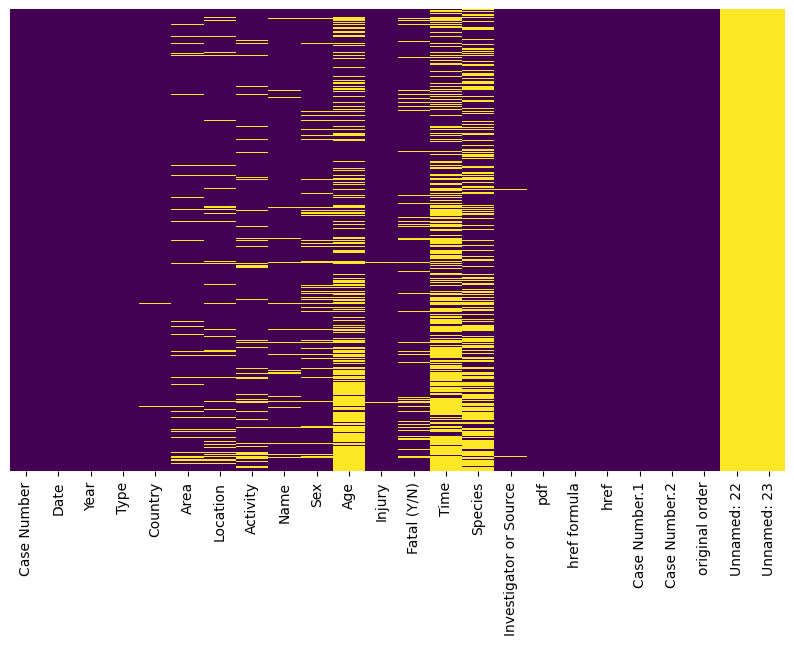

In [12]:
check_nan(shark)

### Voy a trabajar en la columna "Activity"

In [34]:
pd.DataFrame(shark["Activity"].value_counts())

,Activity
Surfing,927
Swimming,773
Fishing,409
Spearfishing,306
Bathing,147
Wading,138
Diving,109
Standing,98
Snorkeling,87
Scuba diving,63


In [35]:
shark["Activity_clean"] = shark["Activity"].copy()

In [36]:
shark["Activity_clean"] = shark["Activity_clean"].astype(str)

In [37]:
shark["Activity_clean"] = shark["Activity_clean"].str.rstrip() #Hay elementos con espacio al final

In [38]:
extract_surfing = lambda s: "Surfing" if "surf" in s.lower() or "paddle" in s.lower() or "boogie" in s.lower() or "body" in s.lower() else s

In [39]:
shark["Activity_clean"] = shark["Activity_clean"].apply(extract_surfing)

In [40]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Swimming,814
Fishing,421
nan,384
Spearfishing,313
Bathing,149
Wading,138
Diving,112
Standing,100
Snorkeling,87


In [41]:
extract_fishing = lambda s: "Fishing" if "fishing" in s.lower() else s

In [42]:
shark["Activity_clean"] = shark["Activity_clean"].apply(extract_fishing)

In [43]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Fishing,1064
Swimming,814
nan,384
Bathing,149
Wading,138
Diving,112
Standing,100
Snorkeling,87
Scuba diving,63


In [44]:
extract_diving = lambda s: "Diving" if "diving" in s.lower() or "snork"  in s.lower() else s

In [45]:
shark["Activity_clean"] = shark["Activity_clean"].apply(extract_diving)

In [46]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Fishing,1064
Swimming,814
Diving,548
nan,384
Bathing,149
Wading,138
Standing,100
Kayaking,33
Fell overboard,30


In [47]:
extract_swimming = lambda s: "Swimming" if "swim" in s.lower() else s

In [48]:
shark["Activity_clean"] = shark["Activity_clean"].apply(extract_swimming)

In [49]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Fishing,1064
Swimming,973
Diving,548
nan,384
Bathing,149
Wading,138
Standing,100
Kayaking,33
Fell overboard,30


In [50]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Fishing,1064
Swimming,973
Diving,548
nan,384
Bathing,149
Wading,138
Standing,100
Kayaking,33
Fell overboard,30


In [51]:
def clean_act(string):

    """
    This function cleans the variable Activity.
    Args:
        - Strings on variable Activity
    Returns:
    - Returns all the new categories in the variable Activity after implemented a regrex patron on them.

    """

    if(re.search(r'\bsurf|paddle|windsurf',string, re.IGNORECASE) != None):
        return "Surfing"
    elif(re.search(r'\bpulling|cleaning|spear|washing|crayfish|fish|lobster',string, re.IGNORECASE) != None):
        return "Fishing"
    elif(re.search(r'\bphotographing|snorkeling|filming|dive|diving|scuba|diving|feeding',string, re.IGNORECASE) != None):
        return "Diving"
    elif(re.search(r'\bwaist|knee-deep|bathing|swim|float',string, re.IGNORECASE) != None):
        return "Bathing"
    elif(re.search(r'\bfreighter|boat|sank|overboard|wreck|ferry|sunk|sink|founde|submarine',string, re.IGNORECASE) != None):
        return "Sea disaster"
    elif(re.search(r'\bskiing|kayak|rowing|canoe|play|board',string, re.IGNORECASE) != None):
        return "Water sports"
    elif(re.search(r'\bsail|yacht',string, re.IGNORECASE) != None):
        return "Sailing"
    elif(re.search(r'\bcrashed|air|plane',string, re.IGNORECASE) != None):
        return "Plane crash"
    elif(re.search(r'\bshark',string, re.IGNORECASE) != None):
        return "Direct interaction with sharks"
    elif(re.search(r'\binto',string, re.IGNORECASE) != None):
        return "Falls into the sea"
    elif(re.search(r'\badrift',string, re.IGNORECASE) != None):
        return "Adrift"
    elif string == "Unknown":
        return "Unknown"
    else:
        return "Other"

In [52]:
shark["Activity_clean"] = shark["Activity_clean"].apply(clean_act)

In [53]:
pd.DataFrame(shark["Activity_clean"].value_counts())

,Activity_clean
Surfing,1353
Bathing,1198
Fishing,1125
Other,882
Diving,582
Sea disaster,253
Water sports,129
Direct interaction with sharks,94
Falls into the sea,26
Plane crash,26


### Trabajo con la columna "Fatal (Y/N)"

In [96]:
shark["Fatal (Y/N)"].value_counts()

N     4293
Y     1388
 N       7
M        1
N        1
y        1
Name: Fatal (Y/N), dtype: int64

In [97]:
shark["Dead or alive"] = shark["Fatal (Y/N)"].copy()

In [98]:
shark["Fatal (Y/N)"].value_counts()

N     4293
Y     1388
 N       7
M        1
N        1
y        1
Name: Fatal (Y/N), dtype: int64

In [99]:
shark["Dead or alive"] = shark["Dead or alive"].str.lstrip()

In [100]:
shark["Dead or alive"] = shark["Dead or alive"].str.rstrip()

In [101]:
shark["Dead or alive"] = shark["Dead or alive"].replace({'M':'N'})

In [102]:
shark["Dead or alive"] = shark["Dead or alive"].str.upper()

In [103]:
shark["Dead or alive"].value_counts()

N    4302
Y    1389
Name: Dead or alive, dtype: int64

In [104]:
# Reemplaza "Y" con 1 y "N" con 0 en la columna "tu_columna"
shark["Dead or alive"] = shark["Dead or alive"].replace({'Y': 1, 'N': 0})

In [105]:
shark["Dead or alive"] = shark["Dead or alive"].fillna("UNKNOWN")

In [106]:
filas_unknown = shark[shark["Dead or alive"] == "UNKNOWN"]

In [107]:
shark.drop(index=filas_unknown.index, inplace = True)

In [108]:
shark["Dead or alive"].value_counts()

0    4302
1    1389
Name: Dead or alive, dtype: int64

In [109]:
shark[shark["Dead or alive"] == "2017"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Dead or alive,Activity_clean


In [110]:
shark.drop(index=shark[shark["Dead or alive"] == "2017"].index, inplace = True)

In [111]:
shark["Dead or alive"].value_counts()

0    4302
1    1389
Name: Dead or alive, dtype: int64

### WHICH ACTIVITY IS MOST LIKELY TO HAVE THE HIGHEST DEATH RATIO?

In [112]:
activities = pd.get_dummies(shark["Activity_clean"])

In [113]:
activities.head()

,Adrift,Bathing,Direct interaction with sharks,Diving,Falls into the sea,Fishing,Other,Plane crash,Sailing,Sea disaster,Surfing,Water sports
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
activities = activities.join(shark["Dead or alive"])
activities.head(5)

,Adrift,Bathing,Direct interaction with sharks,Diving,Falls into the sea,Fishing,Other,Plane crash,Sailing,Sea disaster,Surfing,Water sports,Dead or alive
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [124]:
correlation = activities.corr()["Dead or alive"][:].sort_values(ascending=False)
correlation

Dead or alive                     1.000000
Sea disaster                      0.254555
Bathing                           0.207322
Falls into the sea                0.070696
Plane crash                       0.058564
Adrift                            0.022355
Other                             0.000826
Diving                           -0.002766
Sailing                          -0.005274
Water sports                     -0.034315
Direct interaction with sharks   -0.047961
Fishing                          -0.095097
Surfing                          -0.227006
Name: Dead or alive, dtype: float64

In [120]:
import matplotlib.pyplot as plt

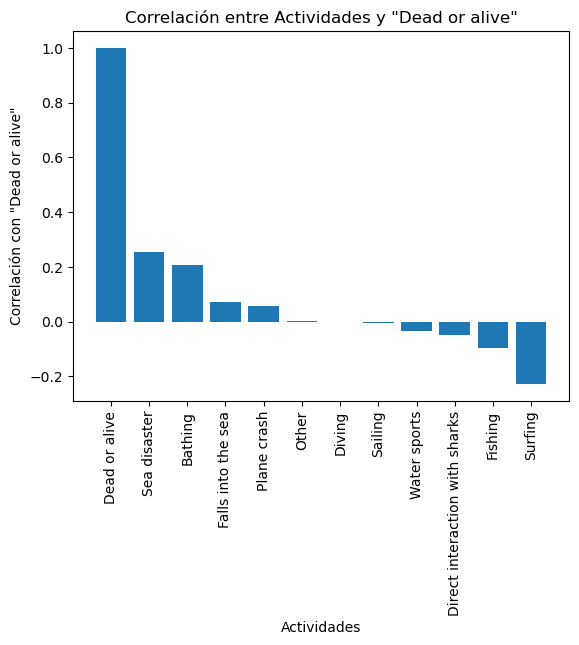

In [121]:
plt.bar(correlation.index, correlation.values)
plt.xlabel('Actividades')
plt.ylabel('Correlación con "Dead or alive"')
plt.title('Correlación entre Actividades y "Dead or alive"')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'Activities' y 'dead or alive'

# Agrupar por 'Activities' y contar vivos (0) y muertos (1)
grouped = shark.groupby('Activities')['dead or alive'].value_counts().unstack().fillna(0)

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Actividades')
ax.set_ylabel('Cantidad')
ax.set_title('Diferencia entre vivos y muertos por actividad')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()


KeyError: 'Activities'

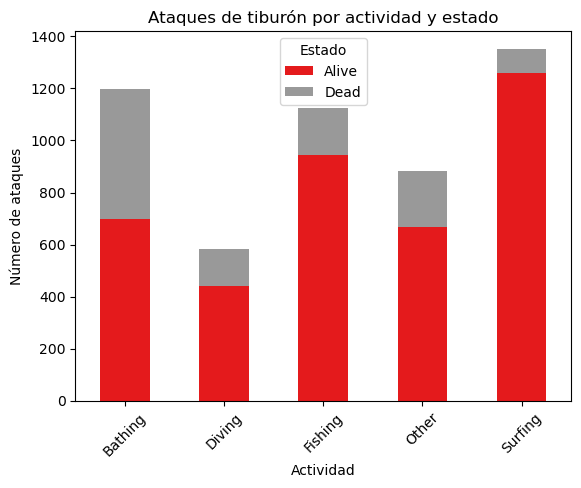

In [133]:
# Primero, necesitas calcular las 5 actividades más comunes.
top_activities = shark["Activity_clean"].value_counts().nlargest(5).index

# Filtra el DataFrame para incluir solo las filas con las 5 actividades más comunes.
shark_filtered = shark[shark["Activity_clean"].isin(top_activities)]

# Ahora, agrupa los datos por 'activity' y 'dead or alive' y cuenta las ocurrencias.
data = shark_filtered.groupby(["Activity_clean", 'Dead or alive']).size().unstack()

# Crea un gráfico de barras apilado.
ax = data.plot(kind='bar', stacked=True, colormap='Set1')

# Personaliza el gráfico.
plt.title('Ataques de tiburón por actividad y estado')
plt.xlabel('Actividad')
plt.ylabel('Número de ataques')
plt.legend(title='Estado', labels=['Alive', 'Dead'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad.

# Muestra el gráfico.
plt.show()

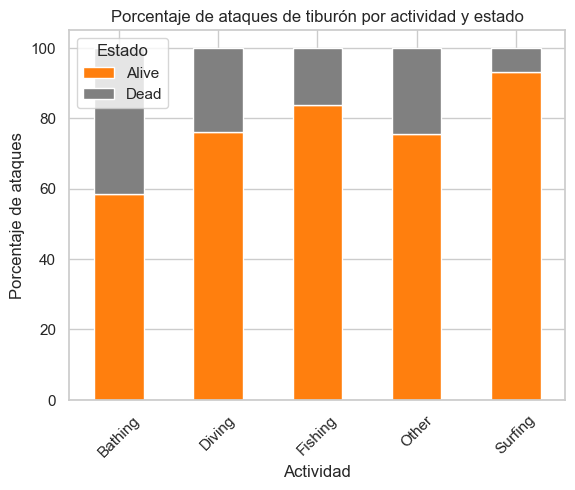

In [134]:

# Supongamos que ya tienes un DataFrame 'df' con las columnas 'activity' y 'dead or alive'.

# Primero, necesitas calcular las 5 actividades más comunes.
top_activities = shark["Activity_clean"].value_counts().nlargest(5).index

# Filtra el DataFrame para incluir solo las filas con las 5 actividades más comunes.
df_filtered = shark[shark["Activity_clean"].isin(top_activities)]

# Ahora, agrupa los datos por 'activity' y 'dead or alive' y cuenta las ocurrencias.
data = shark_filtered.groupby(["Activity_clean", 'Dead or alive']).size().unstack()

# Calcular el porcentaje de 'dead' y 'alive' para cada actividad.
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Define los colores para las barras apiladas.
colors = ['#ff7f0e', '#808080']  # Cambié el orden de los colores.

# Crea el gráfico de barras apiladas con Seaborn.
sns.set(style="whitegrid")
ax = data_percentage.plot(kind='bar', stacked=True, color=colors)

# Personaliza el gráfico.
plt.title('Porcentaje de ataques de tiburón por actividad y estado')
plt.xlabel('Actividad')
plt.ylabel('Porcentaje de ataques')
plt.legend(title='Estado', labels=['Alive', 'Dead'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad.

# Muestra el gráfico.
plt.show()

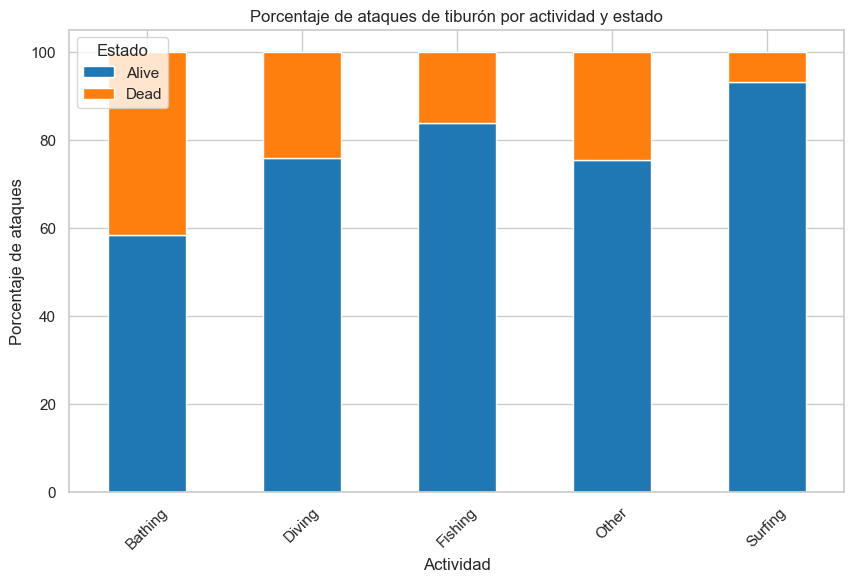

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener las bibliotecas Seaborn y Matplotlib instaladas.

# Supongamos que tienes un DataFrame 'shark' con la columna 'Activity_clean'.

# Primero, necesitas calcular las actividades con más ataques, ordenadas de mayor a menor.
top_activities = shark['Activity_clean'].value_counts().nlargest(5).index

# Filtra el DataFrame para incluir solo las filas con las actividades más comunes.
shark_filtered = shark[shark['Activity_clean'].isin(top_activities)]

# Ahora, agrupa los datos por 'Activity_clean' y 'dead or alive' y cuenta las ocurrencias.
data = shark_filtered.groupby(['Activity_clean', 'Dead or alive']).size().unstack()

# Calcular el porcentaje de 'dead' y 'alive' para cada actividad.
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Define una paleta de colores personalizada con 'dead' en rojo y 'alive' en azul.
colors = ['#1f77b4', '#ff7f0e']  # Azul para 'alive', rojo para 'dead'.

# Establece un estilo personalizado de Seaborn.
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

# Ordena las actividades de mayor a menor número de ataques.
data_percentage = data_percentage.reindex(data_percentage.mean(axis=1).sort_values(ascending=False).index)

# Crea el gráfico de barras apiladas con Seaborn.
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personaliza el gráfico.
plt.title('Porcentaje de ataques de tiburón por actividad y estado')
plt.xlabel('Actividad')
plt.ylabel('Porcentaje de ataques')
plt.legend(title='Estado', labels=['Alive', 'Dead'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad.

# Muestra el gráfico.
plt.show()